Cluster data into predifined number of groups. 

Unsupervised learning as there is no training or testing

No labels are already present in the data

In [1]:
import pandas as pd

df=pd.read_csv('clusterdata.csv')
df

,Unnamed: 0,Name,Fare,Age
0,0,"Braund, Mr. Owen Harris",7.2500,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,38.0
2,2,"Heikkinen, Miss. Laina",7.9250,26.0
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,35.0
4,4,"Allen, Mr. William Henry",8.0500,35.0
...,...,...,...,...
886,886,"Montvila, Rev. Juozas",13.0000,27.0
887,887,"Graham, Miss. Margaret Edith",30.0000,19.0
888,888,"Johnston, Miss. Catherine Helen ""Carrie""",23.4500,NaN
889,889,"Behr, Mr. Karl Howell",30.0000,26.0


In [2]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Name,Fare,Age
0,"Braund, Mr. Owen Harris",7.2500,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,38.0
2,"Heikkinen, Miss. Laina",7.9250,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,35.0
4,"Allen, Mr. William Henry",8.0500,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",13.0000,27.0
887,"Graham, Miss. Margaret Edith",30.0000,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",23.4500,NaN
889,"Behr, Mr. Karl Howell",30.0000,26.0


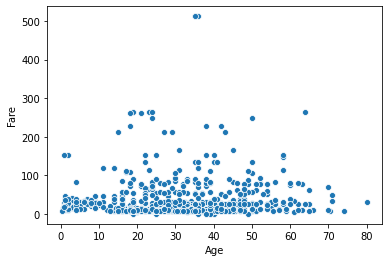

In [3]:
import seaborn as sns
sns.scatterplot(y='Fare',x='Age',data=df)

In [4]:
df.dropna(axis=0,how='any',inplace=True)

In [5]:
"""

NO TRAINING, TESTING SPLIT REQUIRED
"""

'\n\nNO TRAINING, TESTING SPLIT REQUIRED\n'

In [6]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=3) #Form 3 clusters

In [7]:
arr=model.fit_transform(df[['Fare','Age']]) #Do the fitting of the data
#Data is put in cluster with which distance of a given point to its centre is minimum
pd.DataFrame(arr) #shows distance of a data point(1 row) with all cluster centroids(columns). 

,0,1,2
0,11.079502,278.282500,79.253156
1,55.799059,214.207205,14.142925
2,8.723362,277.504585,77.979875
3,37.371360,232.313112,32.184878
4,10.609793,277.357975,77.227273
...,...,...,...
709,16.647113,256.376181,56.231475
710,3.590362,272.413351,72.819737
711,16.571583,255.671136,57.802486
712,13.878197,255.433742,56.154283


In [8]:
arr=model.fit_predict(df[['Fare','Age']]) #We can directly obtain the cluster of a data point
pd.DataFrame(arr)

,0
0,0
1,2
2,0
3,2
4,0
...,...
709,0
710,0
711,0
712,0


In [9]:
df['Predicted Cluster']=arr #add the column to the cluster
df

,Name,Fare,Age,Predicted Cluster
0,"Braund, Mr. Owen Harris",7.2500,22.0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,38.0,2
2,"Heikkinen, Miss. Laina",7.9250,26.0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,35.0,2
4,"Allen, Mr. William Henry",8.0500,35.0,0
...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",29.1250,39.0,0
886,"Montvila, Rev. Juozas",13.0000,27.0,0
887,"Graham, Miss. Margaret Edith",30.0000,19.0,0
889,"Behr, Mr. Karl Howell",30.0000,26.0,0


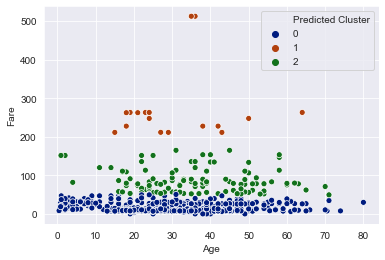

In [10]:
#Plot and see the graph of cluster points hued by the cluster number
sns.set_style('darkgrid')
sns.scatterplot(y='Fare',x='Age',hue='Predicted Cluster',data=df,palette='dark')

In [11]:
import numpy as np
model.fit_predict(np.array([[100],[231],[50]]))

array([0, 1, 2], dtype=int32)